In [1]:
import pandas as pd
import ast
from datetime import timezone
import math
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('complete_set.csv')

In [5]:
#removing all the sales with no pr
df = df[df['_id_y'].notna()]

In [6]:
df = df.reset_index()

In [7]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'index'], axis = 1)
df.head()

,_id_x,art_url,item_type,utc_date,country_code,track_album_slug_text,country,slug_type,amount_paid_fmt,item_price,item_description,art_id,join_key,amount_paid,releases,artist_name,currency,album_title,amount_paid_usd,package_image_id,amount_over_fmt,item_slug,addl_count,_id_y,albumRelease,numTracks,name,dateModified,@id,keywords,image,comment,byArtist,track,@type,datePublished,@context,duration,offers,duration_secs,inAlbum,url,description,isrcCode,recordingOf,@graph
0,1599688803.5175&//girlbanddublin.bandcamp.com/...,https://f4.bcbits.com/img/a0206405257_7.jpg,a,1.599689e+09,gb,NaN,United Kingdom,a,$9.99,9.99,Live at Vicar Street,2.064053e+08,//girlbanddublin.bandcamp.com/album/live-at-vi...,9.99,NaN,Girl Band,USD,NaN,9.99,NaN,NaN,NaN,NaN,https://girlbanddublin.bandcamp.com/album/live...,[{'@id': 'https://girlbanddublin.bandcamp.com/...,14.0,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,https://girlbanddublin.bandcamp.com/album/live...,"Alternative, noise, post-punk, Ireland",https://f4.bcbits.com/img/a0206405257_10.jpg,"[{'text': [""Possibly the greatest live album s...","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,02 Sep 2020 13:45:09 GMT,https://schema.org,NaN,NaN,NaN,NaN,NaN,"In November 2019, Girl Band played back to bac...",NaN,NaN,NaN
1,1599688805.27838&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a2984241552_7.jpg,a,1.599689e+09,fi,NaN,Finland,a,£1,1.00,Neurogen,2.984242e+09,//maharettarecords.bandcamp.com/album/neurogen,1.00,NaN,Jirah,GBP,NaN,1.30,NaN,NaN,NaN,NaN,https://maharettarecords.bandcamp.com/album/ne...,"[{'@type': ['Product', 'MusicRelease'], 'offer...",1.0,Neurogen,28 Mar 2020 15:10:47 GMT,https://maharettarecords.bandcamp.com/album/ne...,"Electronic, Psychedelic Trance, psytrance, London",https://f4.bcbits.com/img/a2984241552_10.jpg,NaN,"{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,28 Mar 2020 15:10:13 GMT,https://schema.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1599688805.90646&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a3320494770_7.jpg,a,1.599689e+09,fi,NaN,Finland,a,£3,3.00,The Last Snare Bender,3.320495e+09,//maharettarecords.bandcamp.com/album/the-last...,3.00,NaN,D-Ther,GBP,NaN,3.90,NaN,NaN,NaN,NaN,https://maharettarecords.bandcamp.com/album/th...,[{'url': 'https://maharettarecords.bandcamp.co...,2.0,The Last Snare Bender,21 Aug 2020 08:55:39 GMT,https://maharettarecords.bandcamp.com/album/th...,"Electronic, Psychedelic Trance, psytrance, London",https://f4.bcbits.com/img/a3320494770_10.jpg,NaN,"{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,21 Aug 2020 08:55:39 GMT,https://schema.org,NaN,NaN,NaN,NaN,NaN,Maharetta Records proudly presents 'The Last S...,NaN,NaN,NaN
3,1599688809.07942&//linguaignota.bandcamp.com/t...,https://f4.bcbits.com/img/a3428873396_7.jpg,t,1.599689e+09,us,NaN,United States,t,$1,1.00,O Ruthless Great Divine Director,3.428873e+09,//linguaignota.bandcamp.com/track/o-ruthless-g...,1.00,NaN,LINGUA IGNOTA,USD,NaN,1.00,NaN,NaN,NaN,NaN,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,NaN,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,https://linguaignota.bandcamp.com/track/o-ruth...,"Experimental, retribution, United States",['https://f4.bcbits.com/img/a3428873396_10.jpg'],[{'author': {'image': 'https://f4.bcbits.com/i...,{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT,https://schema.org,P00H05M13S,"{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,NaN,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,USA2P2009256,{'lyrics': {'text': 'EVERYONE I KNOW’S A FUCKI...,NaN
4,1599688812.69267&//sofiefatouretchi.bandcamp.c...,https://f4.bcbits.com/img/a0772371002_7.jpg,t,1.599689e+09,us,NaN,United States,t,$1.29,1.29,Try to Reach Me,7.723710e+08,//sofiefatouretchi.bandcam

### Missing Values

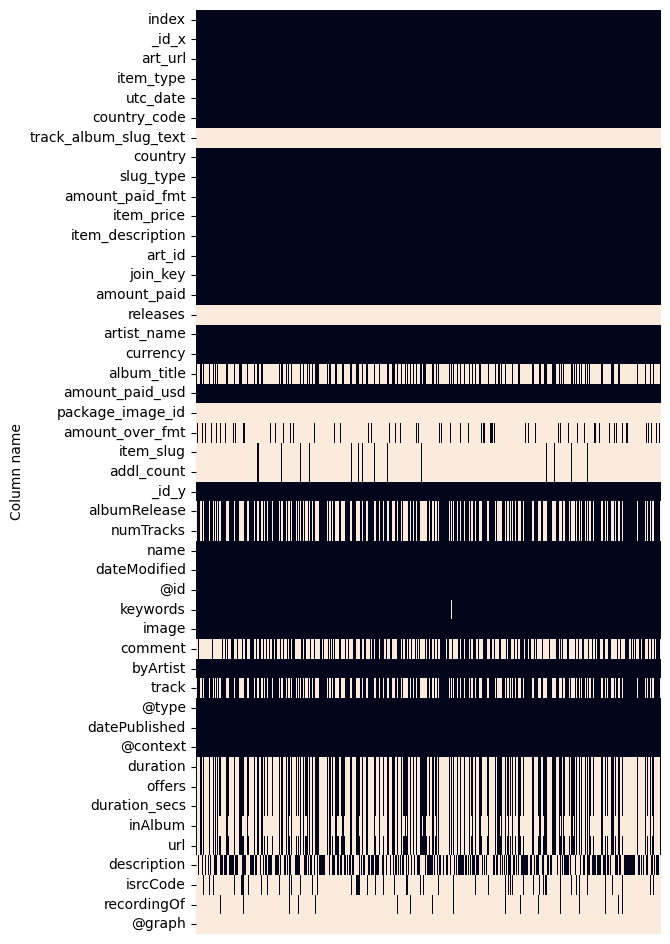

In [8]:
plt.figure(figsize=(6,12))

ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.title('')
plt.xlabel('')
plt.ylabel('Column name') 
ax.set_xticks([])

plt.savefig('heatmap.png', bbox_inches='tight', dpi=150)
plt.show()

In [8]:
df_c = df.drop(['track_album_slug_text', 'releases', 'package_image_id', 'item_slug', 'addl_count', 'comment', 'description', 'isrcCode', 'recordingOf', '@graph', 'duration_secs', 'amount_over_fmt'], axis = 1)

### Ambiguous features

Several features are transformed features of others. Those are removed. 

In [9]:
df_c = df_c.drop(['country', 'slug_type', 'amount_paid_fmt', 'duration', '_id_x', '@id', 'join_key'], axis = 1)

### Removing URLs and key identifiers

Several features are just weblinks or key identifiers that do not contain any inherent value. 

In [10]:
weblinks = ['art_url', '_id_y', 'image', '@context', 'url']
key_id = ['art_id']

df_c = df_c.drop(['art_url', '_id_y', 'image', '@context', 'url', 'art_id'] ,axis= 1)

### Text features

the feature Item_description needs text analysis. Out of scope of thesis, so removed

In [11]:
df_c = df_c.drop('item_description', axis = 1)

In [12]:
#counting number of unique values in textual feature
print(df_c['artist_name'].nunique())
print(df_c['album_title'].nunique())
print(df_c['name'].nunique())

135513
67582
268653


In [13]:
df_c = df_c.drop(['artist_name', 'album_title', 'name'], axis = 1)

### Dictionaries

#### albumRelease

In [14]:
albumRelease = df_c['albumRelease']

In [15]:
albumRelease_count = []

def album_release_count(lst):
    for x in range(0, len(lst)): 
        if df_c['item_type'][x] == 'a':
            dic = ast.literal_eval(lst[x])
            albumRelease_count.append(len(dic))

        elif df_c['item_type'][x] == 't': 
            albumRelease_count.append(1)
        else:
            continue

In [16]:
albumReleases = album_release_count(albumRelease)

In [17]:
df_c = df_c.drop('albumRelease', axis = 1)

In [18]:
df_c['albumRelease'] = albumRelease_count

#### byArtist

In [19]:
byArtist = df_c['byArtist']

In [20]:
by_artist_list = []
def str_to_dict(lst):
    for x in lst:
        if type(x) == str:
            y = ast.literal_eval(x)
            by_artist_list.append(y)
        else:
            by_artist_list.append(float('nan'))
str_to_dict(byArtist)

byArtist_genre_lst = []

def get_keys(lst): 
    for x in lst:
        if type(x) == dict:
            genre = x.get('genre')
            byArtist_genre_lst.append(genre)
        else:
            byArtist_genre_lst.append(float('nan'))
get_keys(by_artist_list)

byArtist_genre = []

def mod_genre(lst):
    for x in lst:
        if type(x) == str:
            x = x.replace("https://bandcamp.com/tag/","")
            byArtist_genre.append(x)
        else:
            byArtist_genre.append(float('nan'))
mod_genre(byArtist_genre_lst)

df_c = df_c.drop('byArtist', axis = 1)
df_c['Genre'] = byArtist_genre

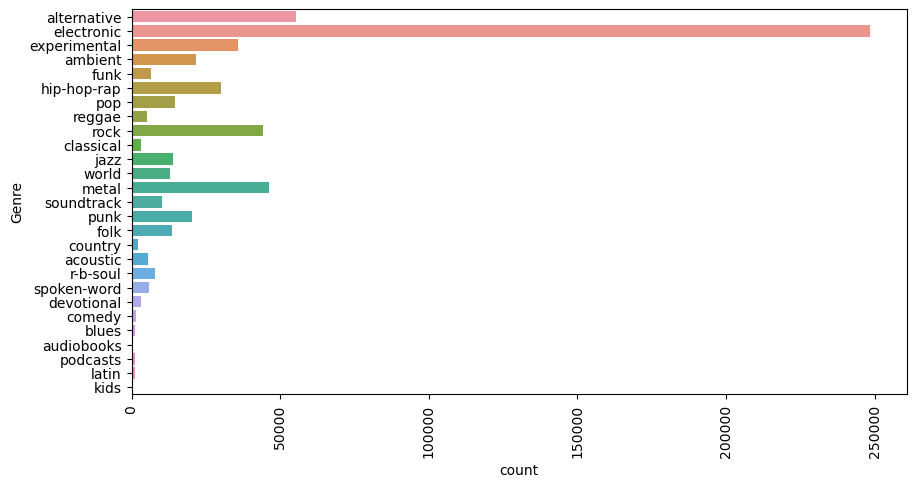

In [21]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(y=df_c["Genre"])

plt.xticks(rotation=90)
plt.savefig('genre_count.png')

#### track

In [22]:
tracks = df_c['track']
tracks[0]

"{'numberOfItems': 14, 'itemListElement': [{'position': 1, '@type': 'ListItem', 'item': {'@id': 'https://girlbanddublin.bandcamp.com/track/pears-for-lunch-live-at-vicar-street', 'url': 'https://girlbanddublin.bandcamp.com/track/pears-for-lunch-live-at-vicar-street', 'duration': 'P00H04M27S', '@type': ['MusicRecording'], 'name': 'Pears for Lunch (Live at Vicar Street)', 'duration_secs': 267.26}}, {'position': 2, '@type': 'ListItem', 'item': {'@id': 'https://girlbanddublin.bandcamp.com/track/fucking-butter-live-at-vicar-street', 'url': 'https://girlbanddublin.bandcamp.com/track/fucking-butter-live-at-vicar-street', 'duration': 'P00H07M49S', '@type': ['MusicRecording'], 'name': 'Fucking Butter (Live at Vicar Street)', 'duration_secs': 469.2}}, {'position': 3, '@type': 'ListItem', 'item': {'@id': 'https://girlbanddublin.bandcamp.com/track/lawman-live-at-vicar-street', 'url': 'https://girlbanddublin.bandcamp.com/track/lawman-live-at-vicar-street', 'duration': 'P00H06M51S', '@type': ['MusicR

In [23]:
df_c = df_c.drop('track', axis = 1)

#### offers

In [24]:
offers = df_c['offers']
offers[3]

"{'price': 1.0, 'priceCurrency': 'USD', 'availability': 'OnlineOnly', '@type': 'Offer', 'priceSpecification': {'minPrice': 1.0}, 'url': 'https://linguaignota.bandcamp.com/track/o-ruthless-great-divine-director#buy'}"

In [25]:
df_c = df_c.drop('offers', axis = 1)

#### inAlbum

In [26]:
inAlbum = df['inAlbum']
item_type = df['item_type']
mod_inAlbum = []

def new_inalbum(lst):
    for x in range(0, len(lst)):
        if item_type[x] == 'a':
            mod_inAlbum.append('is')
        elif item_type[x] == 't':
            if type(lst[x]) == str:
                mod_inAlbum.append('in')
            else:
                mod_inAlbum.append('not')

                
new_inalbum(inAlbum)

In [27]:
df_c = df_c.drop('inAlbum', axis = 1)  
df_c['inAlbum'] = mod_inAlbum

#### Keywords

In [28]:
keywords = df_c['keywords']
keyword_lst = []

def keyword_list(lst):
    for i in range(0, len(lst)):
        j = str(lst[i])
        j = j.replace(" ", "").replace("-", "").replace(".", "").replace("&", "").replace("'", "").lower()
        x = j.split(",")
        for k in range(0,1):
            if len(x) == 1:
                keyword_lst.append(x[0])
            else:
                if x[k] == df_c['Genre'][i]:
                    if len(x) == 2:
                        keyword_lst.append(x[1])
                    else:
                        if x[k+1] == df_c['Genre'][i]:
                            keyword_lst.append(x[k+2])
                        else:
                            keyword_lst.append(x[k+1])
                else:
                    keyword_lst.append(x[k])
keyword_list(keywords)

In [29]:
#extract top 25 tags and turn into list
df_c['keyword_lst'] = keyword_lst
tags = pd.DataFrame(df_c['keyword_lst'].value_counts()[:26])
tags_list = tags.index.tolist()
#remove nan
tags_list = tags_list[1:]

In [30]:
top_tags = []

def modify_tags(keyword_lst, lst2):
    for x in range(0, len(keyword_lst)):
        if keyword_lst[x] in lst2:
            top_tags.append(keyword_lst[x])
        else:
            top_tags.append('other')

modify_tags(keyword_lst, tags_list)

In [31]:
df_c['tags'] = top_tags
df_c = df_c.drop(['keywords', 'keyword_lst'], axis = 1)

#### @type

In [32]:
df_c = df_c.drop('@type', axis = 1)

#### datePublished and dateModified

In [33]:
date_published_values = df_c['datePublished'].values.tolist()
date_modified_values = df_c['dateModified'].values.tolist()

date_published = []
date_modified = []

def time_remove_pub(lst):
    for x in lst:
        y = x[:20]
        date_published.append(y)

def time_remove_mod(lst):
    for x in lst:
        y = x[:20]
        date_modified.append(y)

time_remove_pub(date_published_values)
time_remove_mod(date_modified_values)

date_published = pd.to_datetime(date_published)
date_modified = pd.to_datetime(date_modified)

def to_utc(lst, lst2):
    for x in lst:
        x = x.replace(tzinfo=timezone.utc).timestamp()
        lst2.append(x)

date_pub_utc = []
date_mod_utc = []

to_utc(date_published, date_pub_utc)
to_utc(date_modified, date_mod_utc)

In [34]:
df_c['datePublished'] = date_pub_utc
df_c['dateModified'] = date_mod_utc

### numTracks

In [35]:
numtracks = df_c['numTracks']
num_tracks = [] 

def num_tracks_track(lst):
    for x in lst:
        if math.isnan(x) == True:
            num_tracks.append(1)
        else:
            num_tracks.append(x)

num_tracks_track(numtracks)
df_c['numTracks'] = num_tracks

#### item_price_usd

In [36]:
# conversion rate
conversion_rate = df_c['amount_paid_usd'] / df_c['amount_paid']
df_c['item_price'] = df_c['item_price'] * conversion_rate
df_c.head()

,item_type,utc_date,country_code,item_price,amount_paid,currency,amount_paid_usd,numTracks,dateModified,datePublished,albumRelease,Genre,inAlbum,tags
0,a,1.599689e+09,gb,9.99,9.99,USD,9.99,14.0,1.599054e+09,1.599054e+09,1,alternative,is,other
1,a,1.599689e+09,fi,1.30,1.00,GBP,1.30,1.0,1.585408e+09,1.585408e+09,1,electronic,is,other
2,a,1.599689e+09,fi,3.90,3.00,GBP,3.90,2.0,1.598000e+09,1.598000e+09,1,electronic,is,other
3,t,1.599689e+09,us,1.00,1.00,USD,1.00,1.0,1.585200e+09,1.585200e+09,1,experimental,not,other
4,t,1.599689e+09,us,1.29,1.29,USD,1.29,1.0,1.589933e+09,1.589932e+09,1,alternative,in,other


In [37]:
df_c = df_c.drop('amount_paid', axis = 1)
df_c.head()

,item_type,utc_date,country_code,item_price,currency,amount_paid_usd,numTracks,dateModified,datePublished,albumRelease,Genre,inAlbum,tags
0,a,1.599689e+09,gb,9.99,USD,9.99,14.0,1.599054e+09,1.599054e+09,1,alternative,is,other
1,a,1.599689e+09,fi,1.30,GBP,1.30,1.0,1.585408e+09,1.585408e+09,1,electronic,is,other
2,a,1.599689e+09,fi,3.90,GBP,3.90,2.0,1.598000e+09,1.598000e+09,1,electronic,is,other
3,t,1.599689e+09,us,1.00,USD,1.00,1.0,1.585200e+09,1.585200e+09,1,experimental,not,other
4,t,1.599689e+09,us,1.29,USD,1.29,1.0,1.589933e+09,1.589932e+09,1,alternative,in,other


### Missing values after transformation and deletion

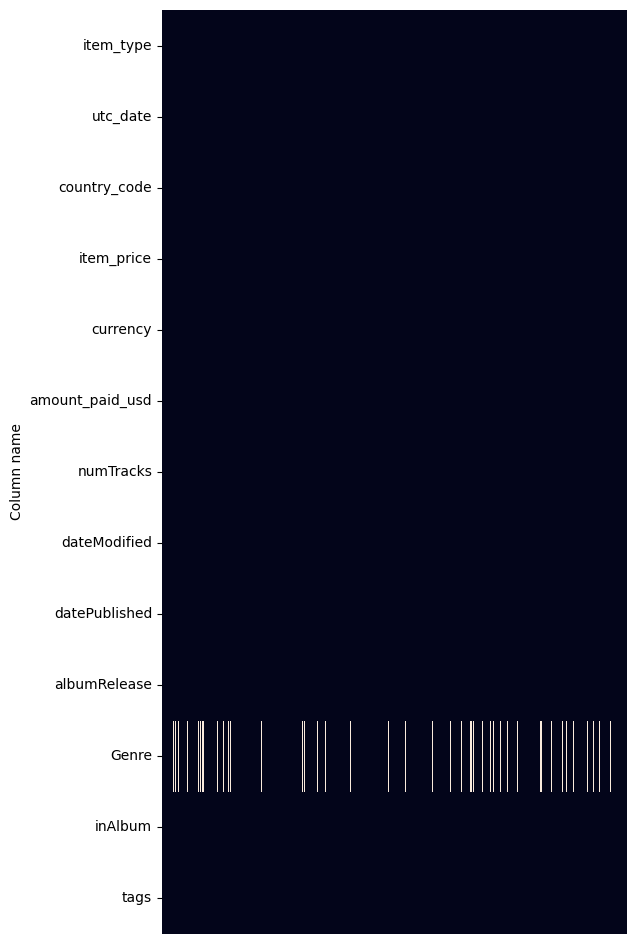

In [40]:
plt.figure(figsize=(6,12))

ax = plt.axes()
sns.heatmap(df_c.isna().transpose(), cbar=False, ax=ax)

plt.title('')
plt.xlabel('')
plt.ylabel('Column name') 
ax.set_xticks([])

plt.savefig('heatmap.png', bbox_inches='tight', dpi=150)
plt.show()

In [41]:
df_c.isna().sum()

item_type              0
utc_date               0
country_code           0
item_price             0
currency               0
amount_paid_usd        0
numTracks              0
dateModified           0
datePublished          0
albumRelease           0
Genre              51685
inAlbum                0
tags                   0
dtype: int64

In [38]:
df_c = df_c[df_c['Genre'].notna()] 

## Outliers

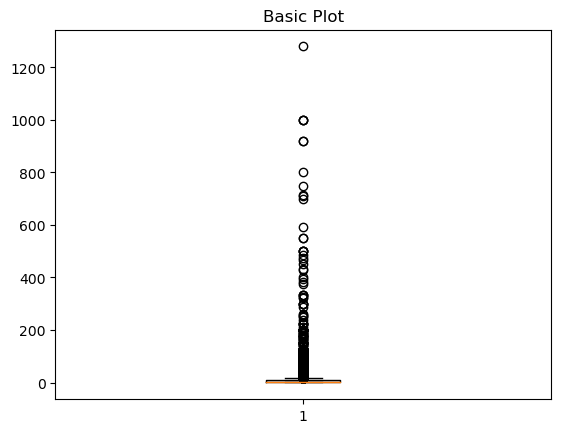

In [39]:
amount_paid = df_c['amount_paid_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(amount_paid)
plt.savefig('boxplot_amount_paid_outliers.png', bbox_inches='tight', dpi=150)

In [40]:
upper = np.mean(amount_paid) + 3 * np.std(amount_paid)
amount_paid_much = [x for x in amount_paid if x > upper] 
len(amount_paid_much)

2888

In [41]:
#removing outliers 
df_c = df_c[df_c['amount_paid_usd'] < upper]

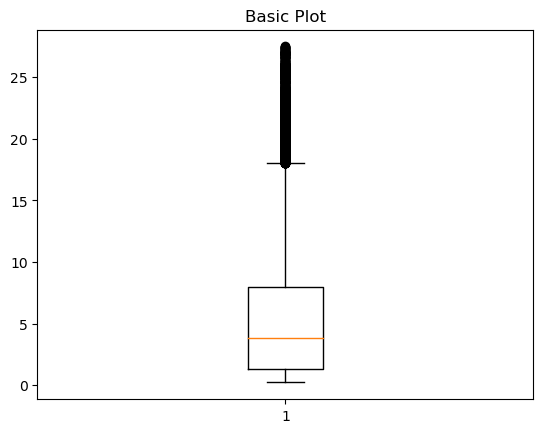

In [42]:
amount_paid = df_c['amount_paid_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(amount_paid)
plt.savefig('boxplot_amount_paid.png', bbox_inches='tight', dpi=150)

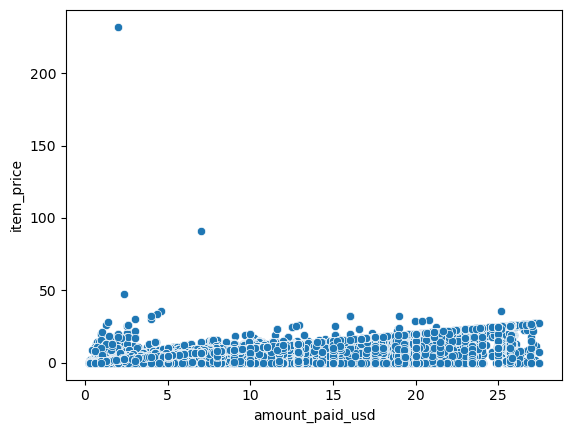

In [43]:
sns.scatterplot(data = df_c, x = 'amount_paid_usd', y = 'item_price')
plt.savefig('plot_item_price_amount_paid.png', bbox_inches='tight', dpi=150)

In [44]:
#removing item_price outliers
item_price = df_c['item_price']
upper = np.mean(item_price) + 3 * np.std(item_price)
item_price_much = [x for x in item_price if x > upper] 
len(item_price_much)

5008

In [45]:
df_c = df_c[df_c['item_price'] < upper]

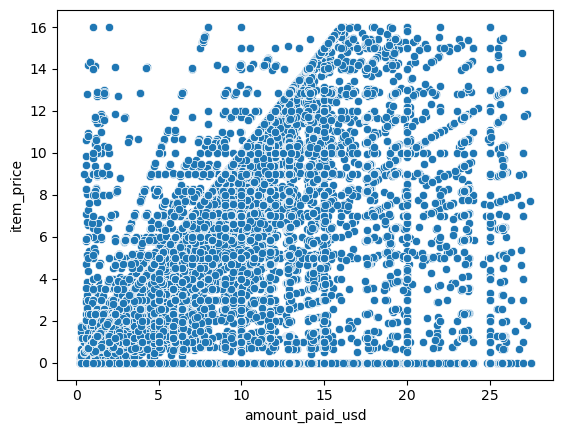

In [46]:
sns.scatterplot(data = df_c, x = 'amount_paid_usd', y = 'item_price')
plt.savefig('plot_item_price_amount_paid2.png', bbox_inches='tight', dpi=150)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
y = df_c['amount_paid_usd']
X = df_c.drop('amount_paid_usd', axis = 1)

In [49]:
#Train/val/test split = 0.6/0.2/0.2
#Train test split (0.8/0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
#train valid split (0.6/0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [51]:
#Saving the dataframes
X_train.to_csv('X_train.csv')
X_valid.to_csv('X_valid.csv')
X_test.to_csv('X_test.csv')

y_train.to_csv('X_train.csv')
y_valid.to_csv('X_valid.csv')
y_test.to_csv('X_test.csv')

In [52]:
df_c.to_csv('df_c.csv')